# Setup Packages

In [54]:
import pandas as pd
from openpyxl import load_workbook
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import export_text
import numpy as np
import os
import io
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import math
import itertools
from functools import reduce
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score


import warnings
warnings.filterwarnings('ignore')

from scipy import stats

from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.mixture import GaussianMixture

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR
from sklearn.svm import SVC

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline

# pd.set_option("display.max_columns", None)
# pd.reset_option('max_rows')

# Auto ml Analysis

In [55]:
from  modules.classification  import idososClass

### Dataset
<hr>

In [57]:
dados_dem = pd.read_excel("Data/Banco de dados_idosos_ccl_dem_INT.xlsx", 'Planilha6', na_values = '?')
dados_dem.head()

,Diagnoses,Sex,IADL,Age,Comorbidities,Scholarity,Handgrip,BBS,STS,GSST,...,Asec,STEP,FMTIT,FMTDT,MMSE,CDT,TMTA,DSF,DSB,VF
0,0,1,1.0,68.0,2.0,13.0,27.9,56.0,11.0,1.023891,...,1.038062,69.0,15.78,18.40,29,2.0,73.0,7.0,3.0,24.0
1,0,1,1.0,61.0,3.0,21.0,17.7,56.0,15.0,1.183432,...,1.022495,91.0,17.31,14.05,29,3.0,50.0,6.0,6.0,21.0
2,0,1,1.0,71.0,2.0,5.0,13.2,56.0,18.0,1.104972,...,0.891530,87.0,16.84,10.39,26,2.0,65.0,8.0,4.0,17.0
3,0,2,1.0,71.0,2.0,4.0,33.8,56.0,16.0,1.477833,...,0.917431,131.0,112.43,16.00,26,1.0,47.0,7.0,6.0,14.0
4,0,1,1.0,77.0,5.0,18.0,13.4,56.0,NaN,0.701754,...,0.983607,NaN,22.48,18.48,29,3.0,46.0,6.0,6.0,23.0


In [61]:
x_cols = dados_dem.drop('Diagnoses', axis=1).columns.to_list()
y_col = 'Diagnoses'
cols_num = ['Age', 'Handgrip', 'BBS', 'STS', 'GSST', 'GSDT', 'Asec', 'STEP', 'FMTIT', 'FMTDT', 'VF', 'TMTA', 'MMSE', 'DSB', 'DSF', 'CDT', 'Comorbidities', 'Scholarity']
cols_cat = ['Sex', 'IADL']


### Split train and test
<hr>

In [62]:
idosos = idososClass(
        dados_dem,
        x_cols=x_cols,
        y_col=y_col,
        cat_cols=cols_cat,
        num_cols=cols_num,
        output_path='./out'
    )

In [63]:
idosos.split_train_test(test_size=0.25)

{'train_shape': 220,
 'test_shape': 52,
 'train_val_count': {0: 138, 2: 50, 1: 32},
 'test_val_count': {0: 35, 2: 10, 1: 7}}

In [64]:
train_info = idosos.x_train.describe()
train_info

,Sex,IADL,Age,Comorbidities,Scholarity,Handgrip,BBS,STS,GSST,GSDT,Asec,STEP,FMTIT,FMTDT,MMSE,CDT,TMTA,DSF,DSB,VF
count,220.000000,212.000000,220.000000,200.000000,206.000000,208.000000,216.000000,217.000000,218.000000,217.000000,217.000000,211.000000,216.000000,215.000000,220.000000,213.000000,208.000000,218.000000,218.000000,216.000000
mean,1.209091,1.278302,74.919607,1.945000,11.359223,24.581731,54.319444,11.649770,0.827720,0.661142,0.717401,73.473934,61.833843,60.121116,25.377273,2.159624,74.895048,6.674312,3.940367,14.851852
std,0.407587,0.449224,7.880156,1.330725,5.040769,7.917409,2.767720,3.353676,0.201908,0.219424,0.297520,23.914193,74.095371,78.694898,4.622600,1.095817,44.869805,2.018208,1.723014,5.588718
min,1.000000,1.000000,60.000000,0.000000,0.000000,8.600000,40.000000,3.000000,0.252850,0.200164,0.000000,0.000000,9.650000,8.520000,5.000000,0.000000,24.620000,2.000000,0.000000,1.000000
25%,1.000000,1.000000,69.000000,1.000000,8.000000,19.675000,54.000000,10.000000,0.692699,0.500000,0.503525,58.500000,19.132500,14.535000,24.000000,1.000000,49.202500,5.000000,3.000000,11.000000
50%,1.000000,1.000000,74.000000,2.000000,12.000000,23.200000,55.000000,11.000000,0.828055,0.677778,0.735294,72.000000,29.400000,24.560000,27.000000,2.000000,60.735000,6.000000,4.000000,15.000000
75%,1.000000,2.000000,80.759240,3.000000,16.000000,27.700000,56.000000,14.000000,0.968525,0.805369,0.935829,89.500000,69.617500,62.660000,29.000000,3.000000,88.975000,8.000000,5.000000,19.000000
max,2.000000,2.000000,97.180014,6.000000,29.000000,74.000000,56.000000,20.000000,1.477833,1.376147,1.571429,159.000000,301.000000,301.000000,30.000000,5.000000,301.000000,13.000000,10.000000,28.000000


In [66]:
train_info = train_info.rename(columns={
    'IADL': 'IADL_2.0',
    'Sex': 'Sex_2',
})

In [67]:
def rescale_values(x, name):
    minn = train_info.loc['min', name]
    maxx = train_info.loc['max', name]
    return x*(maxx-minn) + minn

### Normalize Data
<hr>

In [68]:
num_norma = [MinMaxScaler()]
norm_idosos = idosos.x_normalizator(num_normalizers=num_norma)

### Input missing values
<hr>

In [69]:
idosos.inpututation([KNNImputer(weights= 'distance', n_neighbors= 1)])

### Generate Models
<hr>

In [70]:
rf_parameters_1 = {
    'criterion': ['gini','entropy'],
    'max_features': np.arange(2, 20, 4),
    'n_estimators': [100,500,1000]
}
rf_parameters_2 = {
    'criterion': ['gini','entropy'],
    'max_features': np.arange(2, 20, 4),
    'n_estimators': [100,500,1000],
    'max_depth': [3, 5, 7]
}

In [71]:
dt_parameters_1 = {
    'criterion': ["gini", "entropy"],
    'max_depth': [2, 3, 5, 7]
}


dt_parameters_2 = {
    'criterion': ["gini", "entropy"],
    'ccp_alpha': [0.01, 0.015, 0.02]
}

In [72]:
scores_imb =  [ 
    {
        "name": "f1-weighted",
        "metric": make_scorer(f1_score, average='weighted'),
    },
    {
        "name": "f1-macro",
        "metric": make_scorer(f1_score, average='macro'),
    },
    {
        "name": "f1-micro",
        "metric": make_scorer(f1_score, average='micro'),
    },
    {
        "name": "balanced_accuracy",
        "metric": make_scorer(balanced_accuracy_score),
    },
    {
        "name": "kappa",
        "metric": make_scorer(cohen_kappa_score),
    },
    {
        "name": "accuracy",
        "metric": make_scorer(accuracy_score),
    }

]

In [73]:

evaluate_models = [
    {
        "title": "rf_1",
        "model": RandomForestClassifier(random_state=3),
        "selection": "grid",
        "r/g": {
               "param_grid": rf_parameters_1,
               "cv": 5,
               "scoring": scores_imb
        },
    },
    {
        "title": "rf_2",
        "model": RandomForestClassifier(random_state=3),
        "selection": "grid",
        "r/g": {
               "param_grid": rf_parameters_2,
               "cv": 5,
               "scoring": scores_imb
        },
    },
    {
        "title": "dt_1",
        "model": DecisionTreeClassifier(random_state=3),
        "selection": "grid",
        "r/g": {
               "param_grid": dt_parameters_1,
               "cv": 5,
               "scoring": scores_imb
        },
    },
    {
        "title": "dt_2",
        "model": DecisionTreeClassifier(random_state=3),
        "selection": "grid",
        "r/g": {
               "param_grid": dt_parameters_2,
               "cv": 5,
               "scoring": scores_imb
        },
    },
]

### Evaluate RF and DT models
<hr>

In [74]:
models = idosos.modelEvaluator(evaluate_models, scaled=True, inputed=True)

#### Feature Importance: rf_1 (kappa)

In [ ]:
rf_1 = models['rf_1_scaled_0_inputed_0_x_train']['kappa']

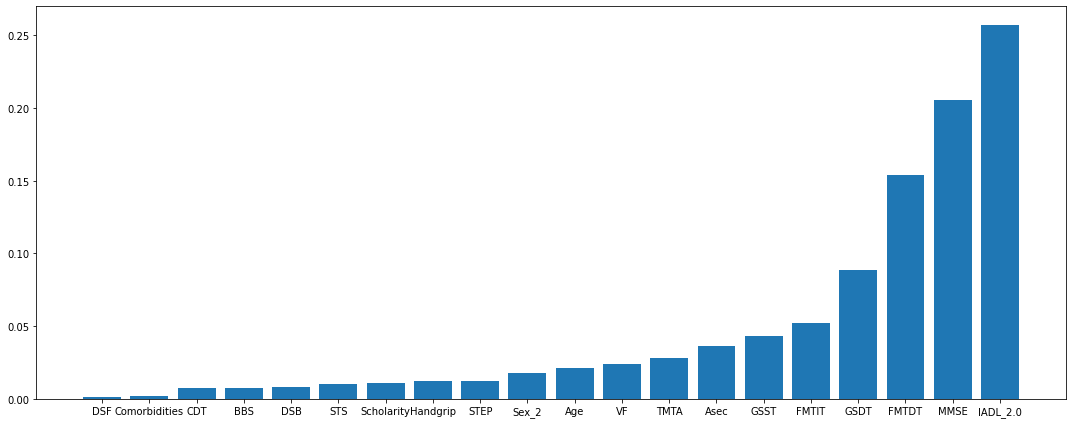

In [ ]:
importance = rf_1.feature_importances_
features = rf_1.feature_names_in_
feature_ord = np.argsort(importance)
plt.figure(figsize=(15, 6))
plt.bar(features[feature_ord], importance[feature_ord], align='center')
plt.tight_layout()
plt.show()

#### Feature Importance: rf_2 (kappa)

In [ ]:
rf_1 = models['rf_2_scaled_0_inputed_0_x_train']['kappa']

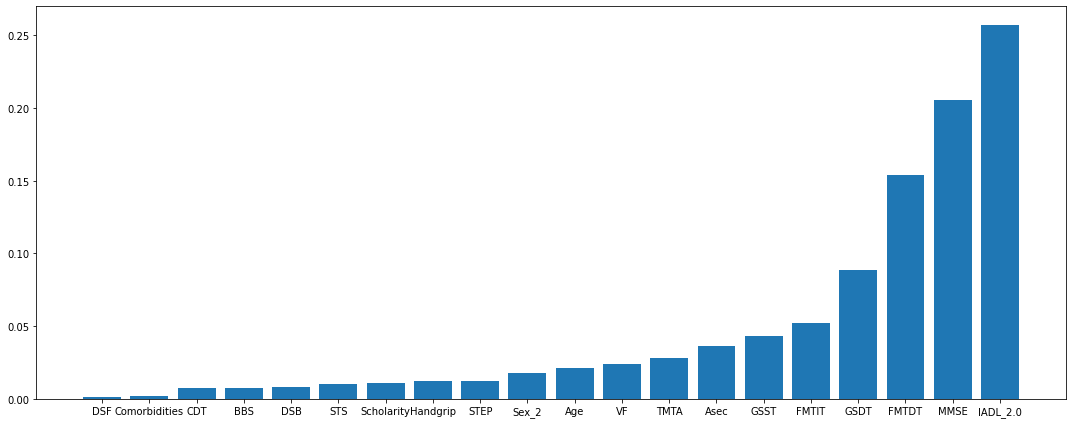

In [ ]:
importance = rf_1.feature_importances_
features = rf_1.feature_names_in_
feature_ord = np.argsort(importance)
plt.figure(figsize=(15, 6))
plt.bar(features[feature_ord], importance[feature_ord], align='center')
plt.tight_layout()
plt.show()

#### Decision Tree: dt_1 (kappa)

In [ ]:
dt_1 = models['dt_1_scaled_0_inputed_0_x_train']['kappa']

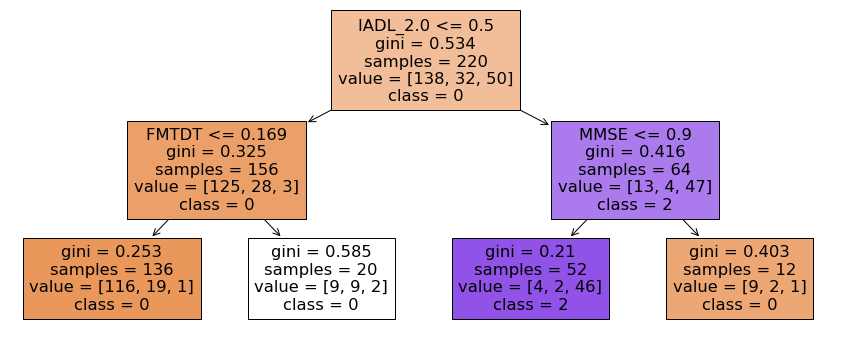

In [ ]:
fig = plt.figure(figsize=(15, 6))
tree_dt1 = tree.plot_tree(dt_1, 
        feature_names=dt_1.feature_names_in_,  
        class_names=dt_1.classes_.astype("str"),
        filled=True)

In [ ]:
text_dt1 = export_text(dt_1, feature_names=list(dt_2.feature_names_in_))
new_text_dt1 = ""
for line in text_dt1.split('\n'):
    if " <= " in line:
        feature = line.split(" <=")[0].split("- ")[1]
        value = line.split("<= ")[1].split('\n')[0]
        new_value = rescale_values(float(value),feature)
        line = line.replace(value, str(new_value))
        new_text_dt1 += line + "\n"
    elif " > " in line:
        feature = line.split(" >")[0].split("- ")[1]
        value = line.split("> ")[1].split('\n')[0]
        new_value = rescale_values(float(value),feature)
        line = line.replace(value, str(new_value))
        new_text_dt1 += line + "\n"
    else:
        new_text_dt1 += line + "\n"
print(new_text_dt1)

|--- IADL_2.0 <= 1.5
|   |--- FMTDT <= 58.241600000000005
|   |   |--- class: 0
|   |--- FMTDT > 58.241600000000005
|   |   |--- class: 0
|--- IADL_2.0 > 1.5
|   |--- MMSE <= 27.5
|   |   |--- class: 2
|   |--- MMSE > 27.5
|   |   |--- class: 0




#### Decision Tree: dt_2 (kappa)

In [ ]:
dt_2 = models['dt_2_scaled_0_inputed_0_x_train']['kappa']

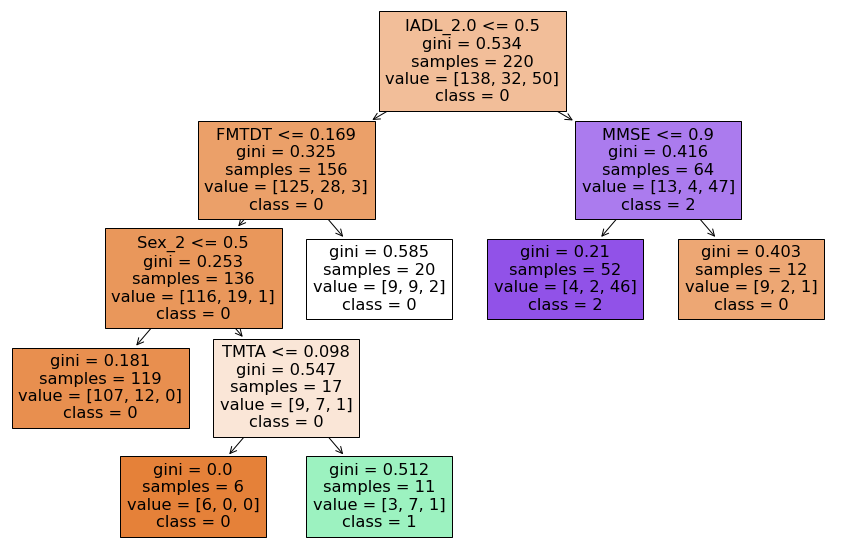

In [ ]:
fig = plt.figure(figsize=(15, 10))
tree_dt2 = tree.plot_tree(dt_2, 
        feature_names=dt_2.feature_names_in_,  
        class_names=dt_2.classes_.astype("str"),
        filled=True)

In [ ]:
text_dt2 = export_text(dt_2, feature_names=list(dt_2.feature_names_in_))
new_text_dt2 = ""
for line in text_dt2.split('\n'):
    if " <= " in line:
        feature = line.split(" <=")[0].split("- ")[1]
        value = line.split("<= ")[1].split('\n')[0]
        new_value = rescale_values(float(value),feature)
        line = line.replace(value, str(new_value))
        new_text_dt2 += line + "\n"
    elif " > " in line:
        feature = line.split(" >")[0].split("- ")[1]
        value = line.split("> ")[1].split('\n')[0]
        new_value = rescale_values(float(value),feature)
        line = line.replace(value, str(new_value))
        new_text_dt2 += line + "\n"
    else:
        new_text_dt2 += line + "\n"
print(new_text_dt2)

|--- IADL_2.0 <= 1.5
|   |--- FMTDT <= 58.241600000000005
|   |   |--- Sex_2 <= 1.5
|   |   |   |--- class: 0
|   |   |--- Sex_2 > 1.5
|   |   |   |--- TMTA <= 52.258
|   |   |   |   |--- class: 0
|   |   |   |--- TMTA > 52.258
|   |   |   |   |--- class: 1
|   |--- FMTDT > 58.241600000000005
|   |   |--- class: 0
|--- IADL_2.0 > 1.5
|   |--- MMSE <= 27.5
|   |   |--- class: 2
|   |--- MMSE > 27.5
|   |   |--- class: 0


